In [1]:
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.neural_network import MLPRegressor
from scipy.stats import pearsonr
from scipy import spatial
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [2]:
def pairwise_accuracy(actual, predicted):
    result1 = []
    for i in range(0,len(actual)):
        result1.append(spatial.distance.cosine(actual[i], predicted[i]))
    return np.mean(result1)

In [3]:
def pearcorr(actual, predicted):
    corr = []
    r2 = []
    for i in range(0, len(actual)):
        corr.append(np.corrcoef(actual[i],predicted[i])[0][1])
        #r2.append(np.corrcoef(actual[i],predicted[i])[0][1]**2)
    return np.mean(corr)

In [4]:
core = np.load('coreferencetask_pred.npy')
ner = np.load('ner_pred.npy')
nli = np.load('nli_pred.npy')
sa = np.load('sa_pred.npy')
qa = np.load('qa_pred.npy')
summary = np.load('summary_pred.npy')
paraphrase = np.load('paraphrase_pred.npy')
wsd = np.load('wsd_pred.npy')
ss = np.load('ss_pred.npy')
srl = np.load('srl_pred.npy')

In [5]:
tasks = [paraphrase, summary, qa, sa, ner, wsd, nli, srl, core, ss]

In [6]:
pairwise = []
corr = []
for i in tasks:
    temp1 = []
    temp2 = []
    for j in tasks:
        temp1.append(pairwise_accuracy(i,j))
        temp2.append(pearcorr(i,j))
    pairwise.append(temp1)
    corr.append(temp2)

In [28]:
np.array(corr).shape

(10, 10)

In [30]:
np.save('pieman_task_corr', np.array(corr))

In [4]:
corr = np.load('pieman_task_corr.npy')
print(corr.shape)

(11, 11)


In [11]:
ROIS = ['PD', 'Sum','QA','SA', 'NER', 'WSD', 'NLI','SRL','CR', 'SS']
fig = ff.create_annotated_heatmap(z=np.round(np.array(corr),3),
                   x=['PD', 'Sum','QA','SA', 'NER', 'WSD', 'NLI','SRL','CR', 'SS'],
                y=ROIS, annotation_text=np.round(np.array(corr),3), showscale=True, zmin =0, zmax=1)
fig['layout']['xaxis']['side'] = 'bottom'
fig.layout.update(width=750,height=450,
  xaxis=dict(
        title='',
        showgrid=False,
        titlefont=dict(
           # family='Gill sans, monospace',
            size=12,
            #color='#7f7f7f'
        ),
        showticklabels=True,
        tickangle=25,
        tickfont=dict(
            size=12,
            color='black'
        ),
    ),
    yaxis=dict(
        title='',
        showgrid=False,
        titlefont=dict(
            #family='Gill sans',
            #size=12,
            #color='#7f7f7f'
        ),
        showticklabels=True,
        tickfont=dict(
            size=12,
            color='black'
        ),
)
)
fig.show()

# Hierarchical Clustering

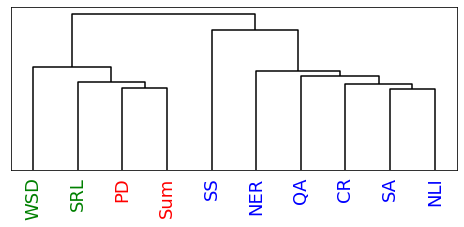

In [12]:
import scipy.cluster.hierarchy as shc
fig = plt.figure(figsize=(8, 3))  
#plt.title("Lucy: Neural Language Taskonomy")  
shc.set_link_color_palette(['black', 'black', 'black', 'black'])
#shc.set_link_color_palette(['red', 'green'])
dend = shc.dendrogram(shc.linkage(np.round(np.array(corr),3), method='ward'), labels=ROIS,
    leaf_rotation=90.,leaf_font_size=18., above_threshold_color='black', p=0.5)
# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = {'PD': 'r', 'Sum': 'r', 'NER': 'b', 'CR': 'b',
               'SS': 'b', 'WSD': 'g', 'SRL': 'g', 'SA': 'b', 'QA': 'b', 'NLI': 'b'}
plt.tick_params(axis='y', which='major', labelsize=12, color='black')


ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])
ax.set_yticklabels([])
ax.set_yticks([])

plt.show()

In [ ]:
import scipy.cluster.hierarchy as shc
ROIS = ['Paraphrase', 'Summarization','QA', 'SA', 'NER', 'WSD', 'NLI','SRL','CR', 'SS']
fig = plt.figure(figsize=(8, 3))  
#plt.title("Lucy: Neural Language Taskonomy")  
shc.set_link_color_palette(['black', 'black', 'black', 'black'])
#shc.set_link_color_palette(['red', 'green'])
dend = shc.dendrogram(shc.linkage(np.round(np.array(pairwise),3), method='ward'), labels=ROIS,
    leaf_rotation=90.,leaf_font_size=18., above_threshold_color='black', p=0.5)
# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = {'Paraphrase': 'r', 'Summarization': 'r', 'NER': 'b', 'CR': 'b',
               'SS': 'b', 'WSD': 'b', 'SRL': 'b', 'SA': 'b', 'QA': 'g', 'NLI': 'g'}
plt.tick_params(axis='y', which='major', labelsize=12, color='black')

ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])
ax.set_yticklabels([])
ax.set_yticks([])
plt.show()